<a href="https://colab.research.google.com/github/LeyloJohnny/First-ML/blob/main/pet_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.3MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 194kB 10.4MB/s 
     |████████████████████████████████| 1.2MB 13.9MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 12.8MB 251kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https

In [4]:
#hide
from fastbook import *

In [5]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [6]:
#hide
Path.BASE_PATH = path

In [7]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [8]:
(path/"images").ls()

(#7393) [Path('images/yorkshire_terrier_31.jpg'),Path('images/pomeranian_147.jpg'),Path('images/english_cocker_spaniel_71.jpg'),Path('images/yorkshire_terrier_150.jpg'),Path('images/staffordshire_bull_terrier_107.jpg'),Path('images/pug_133.jpg'),Path('images/Persian_169.jpg'),Path('images/Persian_195.jpg'),Path('images/Siamese_157.jpg'),Path('images/Siamese_100.jpg')...]

In [9]:
fname = (path/"images").ls()[5]
fname

Path('images/pug_133.jpg')

In [10]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['pug']

In [11]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

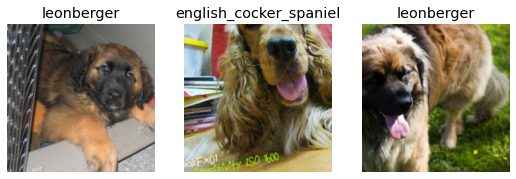

In [12]:
dls.show_batch(nrows=1, ncols=3)

In [13]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_87.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_87.jpg
    applying partial gives
      american_pit_bull_terrier
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(13)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(13))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort':

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.474400,0.363034,0.123139,01:54


epoch,train_loss,valid_loss,error_rate,time
0,0.509350,0.301203,0.098106,02:28
1,0.335463,0.247357,0.081191,02:28


Viewing activations and labels:

In [15]:
#one batch method: returns dependent (y) and independent (x) variables as a mini batch
x,y = dls.one_batch()
#return dependent variables
y

TensorCategory([35, 23,  6, 36, 16,  0, 32, 31, 29, 17, 25,  0,  6,  2, 10, 14, 15, 34, 23, 35, 14,  3, 20, 16, 26, 29, 29, 13, 22, 16,  4, 31,  4, 16, 22, 26, 20, 35, 33,  0,  2,  3, 21, 16,  5,  8, 21, 21,
         8, 23,  3, 11, 30,  0, 28,  5,  9,  8,  0, 27,  6,  4,  9, 12], device='cuda:0')

In [16]:
#get predictions (in this case 37)
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.2012e-07, 5.3669e-08, 5.5595e-07, 7.4704e-08, 4.6511e-08, 2.6351e-07, 3.0158e-07, 2.7861e-07, 1.7403e-06, 4.4852e-08, 6.4493e-08, 4.3117e-07, 3.8127e-06, 4.7050e-07, 5.0023e-07, 2.0483e-07,
        2.4374e-07, 5.2416e-07, 3.2524e-07, 4.2533e-07, 4.6337e-08, 9.7950e-06, 2.4954e-05, 9.0808e-08, 3.2029e-07, 2.2332e-06, 2.7098e-07, 3.0850e-07, 5.1215e-07, 4.7330e-06, 1.6300e-06, 2.4114e-07,
        2.8789e-04, 6.7996e-08, 2.3755e-07, 9.9966e-01, 3.4893e-07])

In [17]:
#all values are between 0 and 1 and add up to 1 in total: 
len(preds[0]),preds[0].sum()

(37, tensor(1.))

Transform activations of our model into predictions, using the _softmax_ activation function:

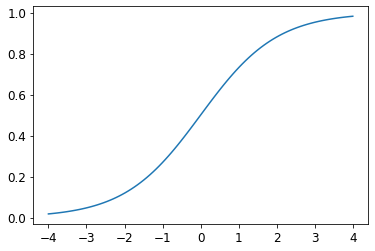

In [19]:
#softmax is similar to sigmoid: 
plot_function(torch.sigmoid, min=-4,max=4);

_softmax_ is the multi-category equivalent of sigmoid:

In [20]:
#generate random activations (6 acts, size 2)
acts = torch.randn((6,2))*2
acts

tensor([[-2.7469,  1.2929],
        [-3.3264, -0.6674],
        [-1.2777,  1.2582],
        [ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914]])

_softmax_ returns the same values as sigmoid for the first column, and those values subtracted from 1 for the second column:

In [21]:

sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

When we first take the softmax, and then the log likelihood of that, that combination is called _cross-entropy loss_. In PyTorch, this is available as nn.CrossEntropyLoss (which, in practice, actually does _log_softmax_ and then _nll_loss_):

In [22]:
#this is a class
#instantiating gives us an object that behaves like a function
loss_func = nn.CrossEntropyLoss()

Example:

In [23]:
targ = tensor([0,1,0,1,1,0])
acts

tensor([[-2.7469,  1.2929],
        [-3.3264, -0.6674],
        [-1.2777,  1.2582],
        [ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914]])

In [24]:
loss_func(acts, targ)

tensor(1.4743)

In [25]:
#or just use the function directly using F.
F.cross_entropy(acts, targ)

tensor(1.4743)

In [26]:
#PyTorch loss functions take the mean of the loss of all items by default
#use reduction='none' to disable that
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([4.0573, 0.0677, 2.6122, 0.2245, 1.8704, 0.0134])

#Model interpretation

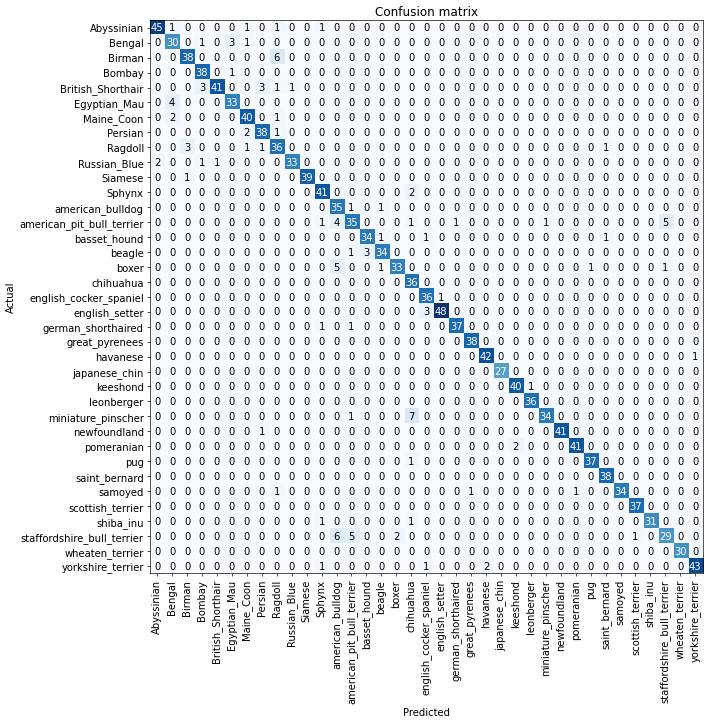

In [27]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

This is a bit hard to read, just use the *most_confused* method to display the most incorrect predictions:

In [28]:
#show at least 5 
interp.most_confused(min_val=5)

[('miniature_pinscher', 'chihuahua', 7),
 ('Birman', 'Ragdoll', 6),
 ('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('boxer', 'american_bulldog', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

#Improving Our Model

### The Learning Rate Finder

A good learning rate is very important for a good model.

Pick either:

- One order of magnitude less than where the minimum loss was achieved (i.e., the minimum divided by 10)
- The last point where the loss was clearly decreasing 

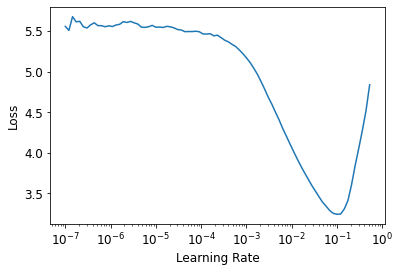

In [29]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [30]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 5.25e-03


Let's choose 3e-3 because it seems to be appropriate:

In [31]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.274632,0.376698,0.113667,01:55


epoch,train_loss,valid_loss,error_rate,time
0,0.558702,0.354358,0.112991,02:28
1,0.322513,0.252207,0.078484,02:28


Now we have a good learning rate. Next step: fine-tune the weights of a pretrained model.

### Unfreezing and Transfer Learning

Fine-tuning: replace the random weights in our added linear layers with weights that correctly achieve our desired task without breaking the carefully pretrained weights and the other layers. 

Simple trick: tell the optimizer to only update the weights in those randomly added final layers. Don't change the weights in the rest of the neural network at all. This is called *freezing* those pretrained layers.

When we call the fine_tune method fastai does two things:

- Trains the randomly added layers for one epoch, with all other layers frozen
- Unfreezes all of the layers, and trains them all for the number of epochs requested


In [32]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.163867,0.317086,0.109608,01:55
1,0.540681,0.267229,0.088633,01:54
2,0.329531,0.215766,0.077131,01:55


In [33]:
#then unfreeze
learn.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.5848931980144698e-06)

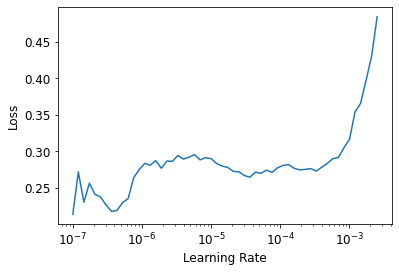

In [34]:
#find new learning rate
learn.lr_find()

In [ ]:
#fine tune with new learning rate
learn.fit_one_cycle(6, lr_max=1e-5)

The deepest layers of our pretrained model might not need as high a learning rate as the last ones, so we should probably use different learning rates for those—this is known as using *discriminative* learning rates.

### Discriminative Learning Rates


 Pass a slice object anywhere that a learning rate is expected:

In [36]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.128611,0.325951,0.114344,01:56
1,0.550603,0.237251,0.077131,01:56
2,0.337496,0.224534,0.078484,01:56


epoch,train_loss,valid_loss,error_rate,time
0,0.263614,0.219923,0.074425,02:28
1,0.253418,0.203504,0.069012,02:29
2,0.238253,0.202458,0.071719,02:29
3,0.220264,0.197627,0.071042,02:29
4,0.188280,0.184769,0.059540,02:29
5,0.174886,0.185561,0.067659,02:28
6,0.153518,0.186282,0.060893,02:28
7,0.150689,0.181486,0.061570,02:29
8,0.129282,0.176496,0.062246,02:29
9,0.133174,0.181669,0.060217,02:29


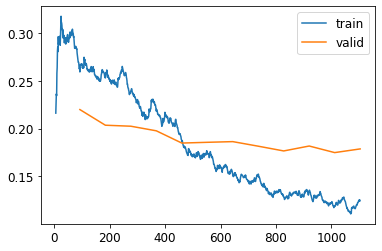

In [37]:
#graph of training and validation loss
learn.recorder.plot_loss()

Eventually the validation loss improvement slows, and sometimes even gets worse! This is the point at which the model is starting to over fit. Doesn't necessarily mean the model gets less accurate!

How long should we train our model?

### Selecting the Number of Epochs

First, train for the amount of time you're willing to wait. Then examine training and validation loss (and metrics!). 

If you have the time to train for more epochs, you may want to instead use that time to train more parameters — that is, use a deeper architecture.

### Deeper Architectures

Using a deeper model is going to require more GPU RAM, so you may need to lower the size of your batches to avoid an out-of-memory error.